# Plotting heatmap overlays

Import `dmslogo` along with the other Python packages used in this example:

In [1]:
# NBVAL_IGNORE_OUTPUT

import matplotlib.pyplot as plt

import numpy

import palettable

import pandas as pd

import dmslogo
import dmslogo.colorschemes

We will make an overlay with two properties shown at a site level.
Make a simple data frame that gives these site values (note how the overlay values are the same for each letter at each site, since the are site level overlays):

In [2]:
data = pd.DataFrame.from_records(
    data=[
        (1, "A", 1, 1, 0),
        (1, "C", 0.7, 1, 0),
        (2, "C", 0.1, 3, 2),
        (2, "D", 1.2, 3, 2),
        (5, "A", 0.4, 2, 4),
        (5, "K", 0.4, 2, 4),
    ],
    columns=["site", "letter", "height", "overlay_val_1", "overlay_val_2"],
)

data

,site,letter,height,overlay_val_1,overlay_val_2
0,1,A,1.0,1,0
1,1,C,0.7,1,0
2,2,C,0.1,3,2
3,2,D,1.2,3,2
4,5,A,0.4,2,4
5,5,K,0.4,2,4


First, we need to convert the numerical values in the data frame to colors.
To do that, we create a [dmslogo.colorschemes.ValueToColorMap](https://jbloomlab.github.io/dmslogo/dmslogo.colorschemes.html#dmslogo.colorschemes.ValueToColorMap) for each overlay value.
Note that you define your own `matplotlib.colors.Colormap`, or use the name of any pre-built [matplotlib colormap](https://matplotlib.org/tutorials/colors/colormaps.html) or any in the larger set provided by [palettable](https://jiffyclub.github.io/palettable/).

Note how below we define each color map, use it create a column in `data` giving the color, and then also draw the scale bar.
This last step is necessary if you want to be able to get a `matplotlib.Figure` that you can use to save the scale bar to show along with the logo plot:


Here is scale bar for first overlay:


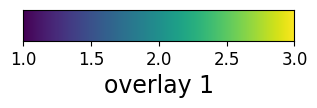


Here is scale bar for second overlay:


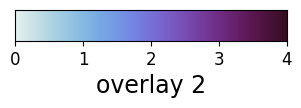

,site,letter,height,overlay_val_1,overlay_val_2,overlay 1,overlay 2
0,1,A,1.0,1,0,#440154,#e6f1f1
1,1,C,0.7,1,0,#440154,#e6f1f1
2,2,C,0.1,3,2,#fde724,#7770d4
3,2,D,1.2,3,2,#fde724,#7770d4
4,5,A,0.4,2,4,#20908c,#360e24
5,5,K,0.4,2,4,#20908c,#360e24


In [3]:
# NBVAL_IGNORE_OUTPUT

print(f"\nHere is scale bar for first overlay:")
map1 = dmslogo.colorschemes.ValueToColorMap(
    minvalue=data["overlay_val_1"].min(),
    maxvalue=data["overlay_val_1"].max(),
    cmap="viridis",
)
map1_fig, _ = map1.scale_bar(orientation="horizontal", label="overlay 1")
display(map1_fig)
plt.close(map1_fig)
data["overlay 1"] = map1.val_to_color(data["overlay_val_1"])

print(f"\nHere is scale bar for second overlay:")
map2 = dmslogo.colorschemes.ValueToColorMap(
    minvalue=data["overlay_val_2"].min(),
    maxvalue=data["overlay_val_2"].max(),
    cmap=palettable.cmocean.sequential.Dense_20.mpl_colormap,
)
map2_fig, _ = map2.scale_bar(orientation="horizontal", label="overlay 2")
display(map2_fig)
plt.close(map2_fig)
data["overlay 2"] = map2.val_to_color(data["overlay_val_2"])

data

Now first use [dmslogo.logo.draw_logo](https://jbloomlab.github.io/dmslogo/dmslogo.logo.html#dmslogo.logo.draw_logo) to draw the logo plot without any overlays:

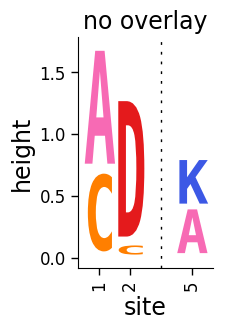

In [4]:
# NBVAL_IGNORE_OUTPUT

fig, axes = dmslogo.draw_logo(
    data=data,
    x_col="site",
    letter_col="letter",
    letter_height_col="height",
    title="no overlay",
)

Now use [dmslogo.logo.draw_logo](https://jbloomlab.github.io/dmslogo/dmslogo.logo.html#dmslogo.logo.draw_logo) to draw the logo plot with the first overlay:

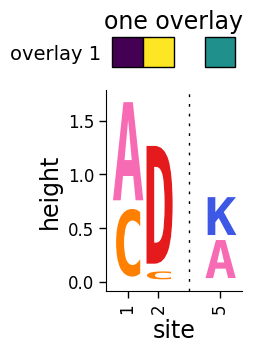

In [5]:
# NBVAL_IGNORE_OUTPUT

fig, ax = dmslogo.draw_logo(
    data=data,
    x_col="site",
    letter_col="letter",
    letter_height_col="height",
    title="one overlay",
    heatmap_overlays=["overlay 1"],
)

Draw with both overlays:

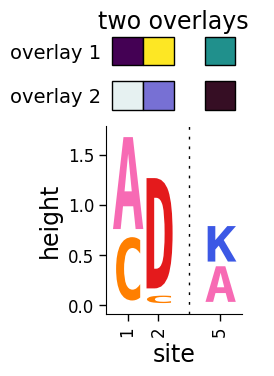

In [6]:
# NBVAL_IGNORE_OUTPUT

fig, axes = dmslogo.draw_logo(
    data=data,
    x_col="site",
    letter_col="letter",
    letter_height_col="height",
    title="two overlays",
    heatmap_overlays=["overlay 1", "overlay 2"],
)